# MovieLens

- download link: https://grouplens.org/datasets/movielens/25m/

In [1]:
!ls ml-25m

genome-scores.csv  links.csv   ratings.csv  tags.csv
genome-tags.csv    movies.csv  README.txt


In [2]:
!cat ml-25m/movies.csv | wc -l

62424


In [3]:
!head -5 ml-25m/movies.csv

In [4]:
import pandas as pd

movies = pd.read_csv('ml-25m/movies.csv', sep=',')

print(type(movies))
movies.head(15)

<class 'pandas.core.frame.DataFrame'>


movieId                               title  \
0         1                    Toy Story (1995)   
1         2                      Jumanji (1995)   
2         3             Grumpier Old Men (1995)   
3         4            Waiting to Exhale (1995)   
4         5  Father of the Bride Part II (1995)   
5         6                         Heat (1995)   
6         7                      Sabrina (1995)   
7         8                 Tom and Huck (1995)   
8         9                 Sudden Death (1995)   
9        10                    GoldenEye (1995)   
10       11      American President, The (1995)   
11       12  Dracula: Dead and Loving It (1995)   
12       13                        Balto (1995)   
13       14                        Nixon (1995)   
14       15             Cutthroat Island (1995)   

                                         genres  
0   Adventure|Animation|Children|Comedy|Fantasy  
1                    Adventure|Children|Fantasy  
2                                Comedy|Romance  
3                          Comedy|Drama|Romance  
4                                        Comedy  
5                         Action|Crime|Thriller  
6                                Comedy|Romance  
7                            Adventure|Children  
8                                        Action  
9                     Action|Adventure|Thriller  
10                         Comedy|Drama|Romance  
11                                Comedy|Horror  
12                 Adventure|Animation|Children  
13                                        Drama  
14                     Action|Adventure|Romance

In [5]:
tags = pd.read_csv('ml-25m/tags.csv', sep=',')

tags.head()

userId  movieId               tag   timestamp
0       3      260           classic  1439472355
1       3      260            sci-fi  1439472256
2       4     1732       dark comedy  1573943598
3       4     1732    great dialogue  1573943604
4       4     7569  so bad it's good  1573943455

In [6]:
ratings = pd.read_csv('ml-25m/ratings.csv', sep=',')

ratings.head()

userId  movieId  rating   timestamp
0       1      296     5.0  1147880044
1       1      306     3.5  1147868817
2       1      307     5.0  1147868828
3       1      665     5.0  1147878820
4       1      899     3.5  1147868510

In [7]:
# removing timestamp

del tags['timestamp']
del ratings['timestamp']

# Data structure

## Series

In [8]:
row_0 = tags.iloc[0]

print(type(row_0))
row_0

<class 'pandas.core.series.Series'>


userId           3
movieId        260
tag        classic
Name: 0, dtype: object

In [9]:
row_0.index

Index(['userId', 'movieId', 'tag'], dtype='object')

In [10]:
row_0['userId']

3

In [11]:
'rating' in row_0

False

In [12]:
tags.index

RangeIndex(start=0, stop=1093360, step=1)

In [13]:
tags.columns

Index(['userId', 'movieId', 'tag'], dtype='object')

In [14]:
tags.iloc[[1,11,2000]]

userId  movieId           tag
1          3      260        sci-fi
11         4   164909        cliche
2000     647   164179  twist ending

In [15]:
ratings['rating'].describe()

count    2.500010e+07
mean     3.533854e+00
std      1.060744e+00
min      5.000000e-01
25%      3.000000e+00
50%      3.500000e+00
75%      4.000000e+00
max      5.000000e+00
Name: rating, dtype: float64

In [16]:
ratings['rating'].mean()

3.533854451353085

In [17]:
ratings.mean()

userId     81189.281154
movieId    21387.981943
rating         3.533854
dtype: float64

In [18]:
ratings['rating'].min()

0.5

In [19]:
ratings['rating'].max()

5.0

In [20]:
ratings['rating'].std()

1.0607439610179747

In [21]:
ratings['rating'].mode()

0    4.0
dtype: float64

In [22]:
ratings.corr()

userId   movieId    rating
userId   1.000000 -0.004413  0.001940
movieId -0.004413  1.000000 -0.009216
rating   0.001940 -0.009216  1.000000

In [23]:
filter_1 = ratings['rating'] > 5
print(type(filter_1))
filter_1.any()

<class 'pandas.core.series.Series'>


False

In [24]:
filter_2 = ratings['rating'] > 0

filter_2.all()

True

# Data Cleaning

- replace : replace specific value with another.
- fillna -> 'ffill', 'backfill' : fill nan values with previous or next value.
- dropna -> axis = 0,1,.. : drop row or column that have a nan value.
- interpolation : insert a value in nan field that corresponds to linear equation.

In [25]:
import numpy as np

print(np.nan)

nan


In [26]:
movies.shape

(62423, 3)

In [27]:
movies.isnull().any()

movieId    False
title      False
genres     False
dtype: bool

In [28]:
tags.shape

(1093360, 3)

In [29]:
tags.isnull().any()

userId     False
movieId    False
tag         True
dtype: bool

In [30]:
tags = tags.dropna()

In [31]:
tags.shape

(1093344, 3)

In [32]:
tags.isnull().any()

userId     False
movieId    False
tag        False
dtype: bool

# Pandas ploting

- df.plot.par
- df.plot.box
- df.plot.hist: show the distribution of data.
- df.plot : quick line graph.
- df.plot.area ...

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f086e71f050>]],
      dtype=object)

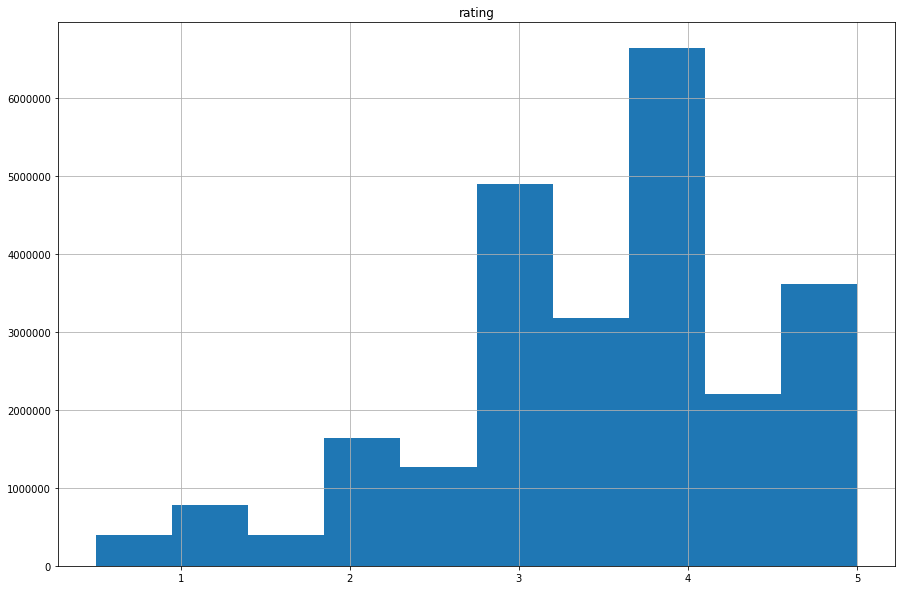

In [33]:
%matplotlib inline

ratings.hist(column='rating', figsize = (15,10))

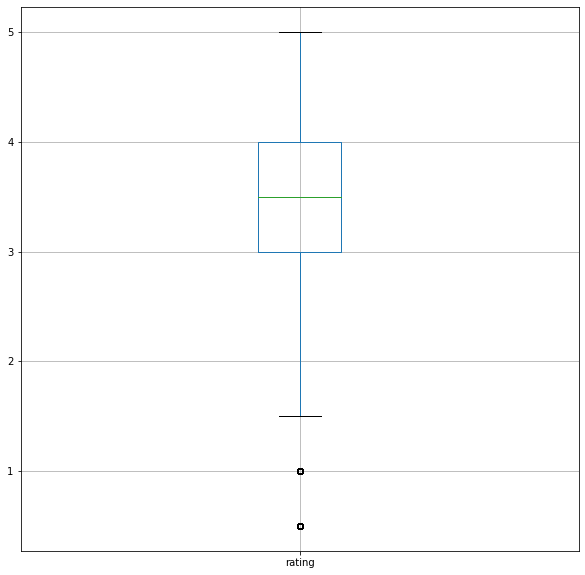

In [34]:
ratings.boxplot(column='rating', figsize=(10,10))

In [44]:
ratings.groupby('rating').size()

rating
0.5     393068
1.0     776815
1.5     399490
2.0    1640868
2.5    1262797
3.0    4896928
3.5    3177318
4.0    6639798
4.5    2200539
5.0    3612474
dtype: int64

In [43]:
ratings.groupby(['rating', 'movieId']).size()

rating  movieId
0.5     1          406
        2          259
        3          135
        4           48
        5          197
                  ... 
5.0     208800       1
        208859       1
        208939       3
        209085       1
        209155       1
Length: 289747, dtype: int64

In [45]:
tags['tag'].head()

0             classic
1              sci-fi
2         dark comedy
3      great dialogue
4    so bad it's good
Name: tag, dtype: object

In [47]:
movies[['title', 'genres']].head()

title  \
0                    Toy Story (1995)   
1                      Jumanji (1995)   
2             Grumpier Old Men (1995)   
3            Waiting to Exhale (1995)   
4  Father of the Bride Part II (1995)   

                                        genres  
0  Adventure|Animation|Children|Comedy|Fantasy  
1                   Adventure|Children|Fantasy  
2                               Comedy|Romance  
3                         Comedy|Drama|Romance  
4                                       Comedy

In [49]:
ratings[1000:1010]

userId  movieId  rating
1000       4    45517     2.5
1001       4    45722     3.5
1002       4    46948     2.5
1003       4    46972     3.5
1004       4    48780     5.0
1005       4    48982     3.0
1006       4    49272     3.5
1007       4    49396     3.5
1008       4    49649     1.0
1009       4    50601     1.5

In [50]:
ratings[-10:]

userId  movieId  rating
25000085  162541     8983     4.5
25000086  162541    31658     4.5
25000087  162541    33794     4.0
25000088  162541    41566     4.0
25000089  162541    45517     4.5
25000090  162541    50872     4.5
25000091  162541    55768     2.5
25000092  162541    56176     2.0
25000093  162541    58559     4.0
25000094  162541    63876     5.0

In [55]:
tags_counts = tags['tag'].value_counts()

tags_counts[:10]

sci-fi                8330
atmospheric           6516
action                5907
comedy                5702
surreal               5326
based on a book       5079
twist ending          4820
funny                 4738
visually appealing    4526
dystopia              4257
Name: tag, dtype: int64

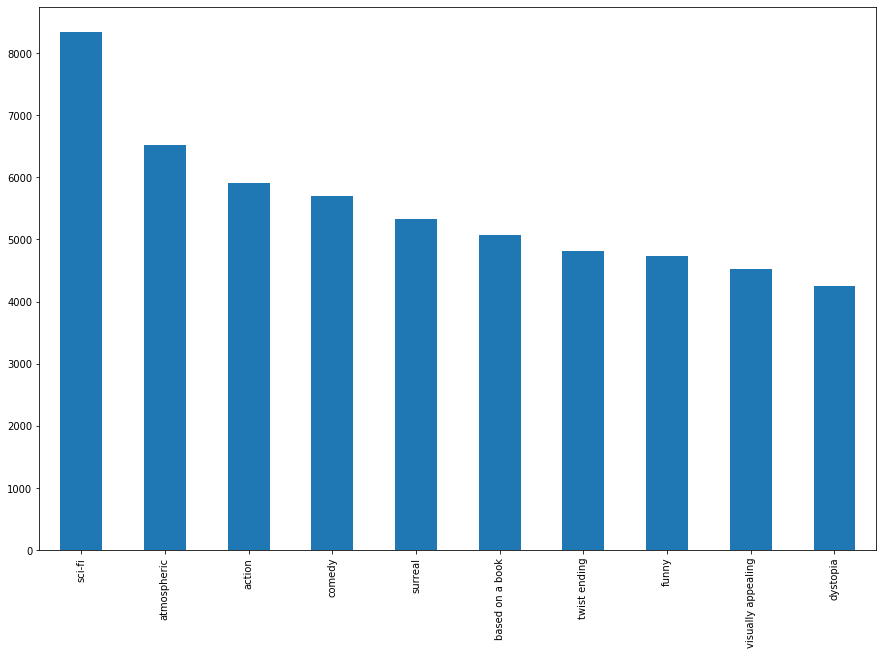

In [56]:
tags_counts[:10].plot(kind = 'bar', figsize = (15,10))

# Filters for Selecting Rows

In [57]:
is_highly_rated = ratings['rating'] >= 4.0

ratings[is_highly_rated][-5:]

userId  movieId  rating
25000088  162541    41566     4.0
25000089  162541    45517     4.5
25000090  162541    50872     4.5
25000093  162541    58559     4.0
25000094  162541    63876     5.0

In [60]:
is_animations = movies['genres'].str.contains('Animation')

movies[is_animations]

movieId                                  title  \
0            1                       Toy Story (1995)   
12          13                           Balto (1995)   
47          48                      Pocahontas (1995)   
236        239                  Goofy Movie, A (1995)   
241        244                Gumby: The Movie (1995)   
...        ...                                    ...   
62383   209035                  time for sushi (2017)   
62385   209041  Yamasong: March of the Hollows (2017)   
62396   209075         Monkey Love Experiments (2014)   
62397   209079                Call of Cuteness (2017)   
62412   209143                    The Painting (2019)   

                                            genres  
0      Adventure|Animation|Children|Comedy|Fantasy  
12                    Adventure|Animation|Children  
47        Animation|Children|Drama|Musical|Romance  
236              Animation|Children|Comedy|Romance  
241                             Animation|Children  
...                                            ...  
62383                             Animation|Comedy  
62385                            Animation|Fantasy  
62396                              Animation|Drama  
62397                                    Animation  
62412                        Animation|Documentary  

[2929 rows x 3 columns]

In [62]:
movies[is_animations].head(15)

movieId                                       title  \
0          1                            Toy Story (1995)   
12        13                                Balto (1995)   
47        48                           Pocahontas (1995)   
236      239                       Goofy Movie, A (1995)   
241      244                     Gumby: The Movie (1995)   
309      313                   Swan Princess, The (1994)   
359      364                       Lion King, The (1994)   
387      392  Secret Adventures of Tom Thumb, The (1993)   
545      551      Nightmare Before Christmas, The (1993)   
551      558                      Pagemaster, The (1994)   
580      588                              Aladdin (1992)   
586      594      Snow White and the Seven Dwarfs (1937)   
587      595                 Beauty and the Beast (1991)   
588      596                            Pinocchio (1940)   
602      610                          Heavy Metal (1981)   

                                              genres  
0        Adventure|Animation|Children|Comedy|Fantasy  
12                      Adventure|Animation|Children  
47          Animation|Children|Drama|Musical|Romance  
236                Animation|Children|Comedy|Romance  
241                               Animation|Children  
309                               Animation|Children  
359  Adventure|Animation|Children|Drama|Musical|IMAX  
387                              Adventure|Animation  
545               Animation|Children|Fantasy|Musical  
551      Action|Adventure|Animation|Children|Fantasy  
580      Adventure|Animation|Children|Comedy|Musical  
586         Animation|Children|Drama|Fantasy|Musical  
587  Animation|Children|Fantasy|Musical|Romance|IMAX  
588               Animation|Children|Fantasy|Musical  
602         Action|Adventure|Animation|Horror|Sci-Fi

In [64]:
average_ratings = ratings[['rating', 'movieId']].groupby('movieId').mean()

average_ratings.tail()

rating
movieId        
209157      1.5
209159      3.0
209163      4.5
209169      3.0
209171      3.0

# Merging Dataframes

- pd.concat([left, right], axis = 1, join="inner")
- left.append(right)
- pd.merge(left, right, how="inner") 

In [67]:
t = movies.merge(tags, on='movieId', how='inner')

t.head()

movieId             title                                       genres  \
0        1  Toy Story (1995)  Adventure|Animation|Children|Comedy|Fantasy   
1        1  Toy Story (1995)  Adventure|Animation|Children|Comedy|Fantasy   
2        1  Toy Story (1995)  Adventure|Animation|Children|Comedy|Fantasy   
3        1  Toy Story (1995)  Adventure|Animation|Children|Comedy|Fantasy   
4        1  Toy Story (1995)  Adventure|Animation|Children|Comedy|Fantasy   

   userId           tag  
0     791         Owned  
1    1048  imdb top 250  
2    1361         Pixar  
3    3164         Pixar  
4    3164   time travel

In [70]:
avg_ratings = ratings.groupby('movieId', as_index=False).mean()
del avg_ratings['userId']
avg_ratings.head()

movieId    rating
0        1  3.893708
1        2  3.251527
2        3  3.142028
3        4  2.853547
4        5  3.058434

In [71]:
box_office = movies.merge(avg_ratings, on='movieId', how='inner')

box_office.tail()

movieId                           title                  genres  rating
59042   209157                       We (2018)                   Drama     1.5
59043   209159       Window of the Soul (2001)             Documentary     3.0
59044   209163                Bad Poems (2018)            Comedy|Drama     4.5
59045   209169             A Girl Thing (2001)      (no genres listed)     3.0
59046   209171  Women of Devil's Island (1962)  Action|Adventure|Drama     3.0

In [78]:
is_highly_rated = box_office['rating'] >= 4.0

box_office[is_highly_rated][-5:]

movieId                                              title  \
59027   209121        Adrenalin: The BMW Touring Car Story (2014)   
59028   209123  Square Roots: The Story of SpongeBob SquarePan...   
59029   209129                           Destination Titan (2011)   
59041   209155                         Santosh Subramaniam (2008)   
59044   209163                                   Bad Poems (2018)   

                      genres  rating  
59027            Documentary     4.0  
59028            Documentary     4.0  
59029            Documentary     4.5  
59041  Action|Comedy|Romance     5.0  
59044           Comedy|Drama     4.5

In [100]:
box_office[box_office['genres'].str.contains('Comedy') & is_highly_rated].sort_values('rating').tail()

movieId                                  title          genres  rating
38953   161318                      Fast Break (1979)          Comedy     5.0
38739   160822  The Remarkable Mr. Pennypacker (1959)          Comedy     5.0
38383   159904                  Living on Love (1937)  Comedy|Romance     5.0
42234   169338     Brad Williams: Daddy Issues (2016)          Comedy     5.0
37032   156321                  Lost in Alaska (1952)          Comedy     5.0

# Vectorized Strings Operations

- str.split()
- str.contains()
- str.replace(x, y)
- str.extract('regular expression'): find first match

In [105]:
movie_genres = movies['genres'].str.split('|', expand=True)

movie_genres[:10]

0          1         2       3        4     5     6     7     8  \
0  Adventure  Animation  Children  Comedy  Fantasy  None  None  None  None   
1  Adventure   Children   Fantasy    None     None  None  None  None  None   
2     Comedy    Romance      None    None     None  None  None  None  None   
3     Comedy      Drama   Romance    None     None  None  None  None  None   
4     Comedy       None      None    None     None  None  None  None  None   
5     Action      Crime  Thriller    None     None  None  None  None  None   
6     Comedy    Romance      None    None     None  None  None  None  None   
7  Adventure   Children      None    None     None  None  None  None  None   
8     Action       None      None    None     None  None  None  None  None   
9     Action  Adventure  Thriller    None     None  None  None  None  None   

      9  
0  None  
1  None  
2  None  
3  None  
4  None  
5  None  
6  None  
7  None  
8  None  
9  None

In [106]:
movie_genres['isComdy'] = movies['genres'].str.contains('Comdy')

movie_genres.head()

0          1         2       3        4     5     6     7     8  \
0  Adventure  Animation  Children  Comedy  Fantasy  None  None  None  None   
1  Adventure   Children   Fantasy    None     None  None  None  None  None   
2     Comedy    Romance      None    None     None  None  None  None  None   
3     Comedy      Drama   Romance    None     None  None  None  None  None   
4     Comedy       None      None    None     None  None  None  None  None   

      9  isComdy  
0  None    False  
1  None    False  
2  None    False  
3  None    False  
4  None    False

In [146]:
movies['year'] = movies['title'].str.extract('.*\((\d*)\).*', expand=True)

movies.tail()

movieId                           title                  genres  year
62418   209157                       We (2018)                   Drama  2018
62419   209159       Window of the Soul (2001)             Documentary  2001
62420   209163                Bad Poems (2018)            Comedy|Drama  2018
62421   209169             A Girl Thing (2001)      (no genres listed)  2001
62422   209171  Women of Devil's Island (1962)  Action|Adventure|Drama  1962

In [200]:
movies[movies['year'].notna()]

movieId                                        title  \
15036    79607      Millions Game, The (Das Millionenspiel)   
25387   123619                           Terrible Joe Moran   
26284   125571         The Court-Martial of Jackie Robinson   
26309   125632                                In Our Garden   
26392   125958           Stephen Fry In America - New World   
...        ...                                          ...   
62071   207714                       Tales of Found Footage   
62104   207884                             Enduring Destiny   
62285   208597  Punk the Capital: Building a Sound Movement   
62326   208763                 Yosemite: The Fate of Heaven   
62380   208973          The Falklands War: The Untold Story   

                             genres year  
15036  Action|Drama|Sci-Fi|Thriller  NaN  
25387            (no genres listed)  NaN  
26284            (no genres listed)  NaN  
26309            (no genres listed)  NaN  
26392            (no genres listed)  NaN  
...                             ...  ...  
62071            (no genres listed)  NaN  
62104            (no genres listed)  NaN  
62285                   Documentary  NaN  
62326            (no genres listed)  NaN  
62380            (no genres listed)  NaN  

[410 rows x 4 columns]

# Datetime manipulation

In [147]:
tags = pd.read_csv('ml-25m/tags.csv', sep=',')

In [148]:
tags.dtypes

userId        int64
movieId       int64
tag          object
timestamp     int64
dtype: object

In [149]:
tags['parsed_time'] = pd.to_datetime(tags['timestamp'], unit='s')

print(tags['parsed_time'].dtype)

tags.head()

datetime64[ns]


userId  movieId               tag   timestamp         parsed_time
0       3      260           classic  1439472355 2015-08-13 13:25:55
1       3      260            sci-fi  1439472256 2015-08-13 13:24:16
2       4     1732       dark comedy  1573943598 2019-11-16 22:33:18
3       4     1732    great dialogue  1573943604 2019-11-16 22:33:24
4       4     7569  so bad it's good  1573943455 2019-11-16 22:30:55

In [150]:
greater_than_t = tags['parsed_time'] > '2015-02-01'

selected_rows = tags[greater_than_t]

print(selected_rows.shape, tags.shape)

selected_rows.head()

(692112, 5) (1093360, 5)


userId  movieId               tag   timestamp         parsed_time
0       3      260           classic  1439472355 2015-08-13 13:25:55
1       3      260            sci-fi  1439472256 2015-08-13 13:24:16
2       4     1732       dark comedy  1573943598 2019-11-16 22:33:18
3       4     1732    great dialogue  1573943604 2019-11-16 22:33:24
4       4     7569  so bad it's good  1573943455 2019-11-16 22:30:55

In [151]:
selected_rows.sort_values(by='parsed_time', ascending=True)[:10]

userId  movieId               tag   timestamp         parsed_time
974276  141361   113565      christianity  1422749043 2015-02-01 00:04:03
974279  141361   113565              cult  1422749051 2015-02-01 00:04:11
974280  141361   113565             drama  1422749058 2015-02-01 00:04:18
974281  141361   113565  fake documentary  1422749066 2015-02-01 00:04:26
974282  141361   113565     found footage  1422749072 2015-02-01 00:04:32
974273  141361   113565        born-again  1422749081 2015-02-01 00:04:41
974285  141361   113565         Jonestown  1422749090 2015-02-01 00:04:50
974284  141361   113565            horror  1422749095 2015-02-01 00:04:55
974278  141361   113565         community  1422749110 2015-02-01 00:05:10
974277  141361   113565  closed community  1422749129 2015-02-01 00:05:29

In [152]:
joined = movies.merge(average_ratings, on= 'movieId', how= 'inner')

joined.tail()

movieId                           title                  genres  year  \
59042   209157                       We (2018)                   Drama  2018   
59043   209159       Window of the Soul (2001)             Documentary  2001   
59044   209163                Bad Poems (2018)            Comedy|Drama  2018   
59045   209169             A Girl Thing (2001)      (no genres listed)  2001   
59046   209171  Women of Devil's Island (1962)  Action|Adventure|Drama  1962   

       rating  
59042     1.5  
59043     3.0  
59044     4.5  
59045     3.0  
59046     3.0

In [202]:
yearly_average = joined[['year','rating']].groupby('year', as_index=False).mean()

yearly_average[-10:]

year    rating
125  2010  3.123972
126  2011  3.133145
127  2012  3.122527
128  2013  3.172131
129  2014  3.158244
130  2015  3.121109
131  2016  3.134078
132  2017  3.101438
133  2018  3.014278
134  2019  2.652123

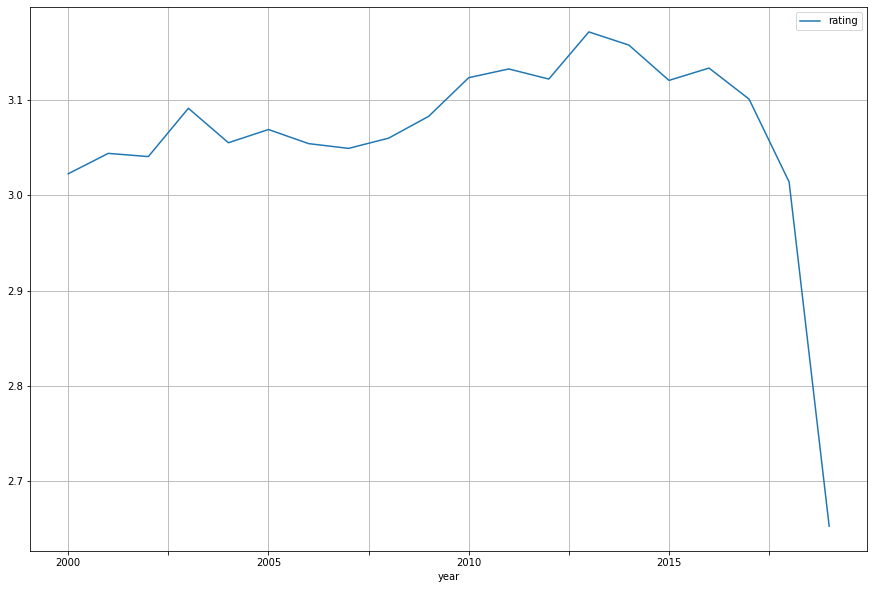

In [203]:
yearly_average[-20:].plot(x='year',y='rating', figsize=(15,10), grid=True)

In [232]:
yearly_average['year'] = yearly_average['year'].astype('int32')

In [233]:
yearly_average.corr()

year    rating
year    1.000000  0.430452
rating  0.430452  1.000000